# main
- This notebook estimates the underlying stochastic volatility process
$$
\begin{align}
\underbrace{\log y_t}_{\text{Observed}} &= \rho_y \log y_{t-1} + \exp(\sigma_{t-1}) \epsilon_t \\
\underbrace{\sigma_t}_{\text{Unobserved}} &= (1-\rho_\sigma) \overline{\sigma} + \rho_{\sigma} \sigma_{t-1} + \sigma_\nu \nu_t \\
\epsilon_t &\sim \mathcal{N}(0, 1) \\
\nu_t &\sim \mathcal{N}(0, 1) 
\end{align} 
$$
- $y_t$ is the (observed) output component
- $\sigma_t$ is unobserved and determines the standard deviation of output innovations

In [1]:
import pandas as pd
import numpy as np
import pystan
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from stancode import code

In [2]:
df = pd.read_csv('../data/cleaned.csv')
df['time'] = pd.to_datetime(df['time'])
df

,y,time,logy,logy_cycle,logy_trend
0,4.975624e+09,1992-07-01,22.327817,0.016050,22.311767
1,4.966802e+09,1992-10-01,22.326042,0.009844,22.316198
2,4.913158e+09,1993-01-01,22.315183,-0.005457,22.320640
3,4.829608e+09,1993-04-01,22.298031,-0.027076,22.325107
4,4.744859e+09,1993-07-01,22.280328,-0.049287,22.329614
...,...,...,...,...,...
101,7.794576e+09,2017-10-01,22.776694,0.036634,22.740060
102,7.691960e+09,2018-01-01,22.763441,0.028029,22.735412
103,7.483266e+09,2018-04-01,22.735935,0.005272,22.730663
104,7.250916e+09,2018-07-01,22.704394,-0.021455,22.725849


In [3]:
datain = {
    'N':len(df), 
    'y':df.logy_cycle
}

In [4]:
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_065fc8c9f275528b3d93856f9fd0e8eb NOW.
In file included from /var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/pystan_os40u_is/stanfit4anon_model_065fc8c9f275528b3d93856f9fd0e8eb_358056193332260647.cpp:1280:
In file included from /Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:
/Users/mitch/envs/main/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/pystan_os40u_is/

In [5]:
fit = sm.sampling(datain, iter=1000, chains=1, seed=1)


Gradient evaluation took 4.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.299882 seconds (Warm-up)
               0.227838 seconds (Sampling)
               0.52772 seconds (Total)



Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 22)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



In [6]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_065fc8c9f275528b3d93856f9fd0e8eb.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
rho_y       0.95  1.7e-3   0.03   0.88   0.93   0.95   0.98    1.0    369    1.0
rho_sigma   0.93  4.3e-3   0.04   0.83   0.91   0.94   0.96   0.99    104    1.0
sigma_bar  -4.38    0.02   0.44  -5.17  -4.66  -4.44  -4.16  -3.18    327    1.0
sigma_nu    0.29    0.01   0.07   0.15   0.24   0.28   0.33   0.43     26   1.05
sigma[1]   -4.21    0.02   0.52  -5.22  -4.55  -4.25  -3.86  -3.17    477   1.01
sigma[2]    -4.2    0.02   0.45  -5.07  -4.49  -4.21   -3.9  -3.22    393   1.02
sigma[3]   -4.13    0.02   0.35  -4.76  -4.38  -4.14  -3.88  -3.41    400   1.02
sigma[4]   -4.05    0.02   0.31  -4.62  -4.27  -4.08  -3.85  -3.37    287    1.0
sigma[5]   -4.08    0.01   0.31  -4.65  -4.28

In [7]:
posterior = fit.to_dataframe()
posterior

,chain,draw,warmup,rho_y,rho_sigma,sigma_bar,sigma_nu,sigma[1],sigma[2],sigma[3],...,sigma[104],sigma[105],sigma[106],lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__
0,0,0,0,0.923751,0.905910,-4.476644,0.213700,-4.535346,-4.481934,-4.192247,...,-4.255189,-3.907742,-4.084672,538.682144,0.967848,0.209502,5.0,31.0,0.0,-481.262416
1,0,1,0,0.880743,0.987465,-4.442436,0.189205,-3.728736,-3.711145,-3.909065,...,-3.870790,-3.477515,-3.566831,536.520039,0.822027,0.209502,5.0,31.0,0.0,-483.242582
2,0,2,0,0.907974,0.983685,-4.457028,0.215722,-3.796028,-3.676172,-4.038840,...,-3.576087,-3.416311,-3.526694,523.500460,0.558221,0.209502,5.0,31.0,0.0,-477.294437
3,0,3,0,0.984815,0.987177,-3.229466,0.268185,-4.661735,-4.223640,-4.162337,...,-4.536564,-4.857694,-4.474886,510.574730,0.841246,0.209502,5.0,31.0,0.0,-463.589879
4,0,4,0,0.912973,0.981271,-3.656516,0.210836,-4.197597,-4.259399,-3.918621,...,-4.218087,-3.868660,-4.266556,521.186652,0.997149,0.209502,5.0,31.0,0.0,-469.214242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,495,0,0.972835,0.958699,-4.313729,0.228739,-4.272650,-4.103749,-4.432526,...,-4.204398,-4.026997,-4.034691,518.956876,0.569719,0.209502,5.0,63.0,0.0,-461.415513
496,0,496,0,0.892805,0.905932,-4.711835,0.233194,-4.162013,-4.100058,-3.429536,...,-3.947577,-3.675843,-3.642606,520.476487,0.947651,0.209502,6.0,63.0,0.0,-467.675238
497,0,497,0,0.943560,0.988636,-3.933871,0.197202,-2.946212,-3.176356,-3.065725,...,-4.390591,-4.423233,-4.414414,519.520948,0.981158,0.209502,5.0,63.0,0.0,-472.237363
498,0,498,0,0.944380,0.995355,-4.217126,0.211789,-3.616300,-3.492807,-3.626981,...,-4.580070,-4.411433,-4.558589,530.996395,0.612567,0.209502,5.0,63.0,0.0,-458.232533


In [8]:
params = posterior[['rho_y', 'rho_sigma', 'sigma_bar', 'sigma_nu']]
params

,rho_y,rho_sigma,sigma_bar,sigma_nu
0,0.923751,0.905910,-4.476644,0.213700
1,0.880743,0.987465,-4.442436,0.189205
2,0.907974,0.983685,-4.457028,0.215722
3,0.984815,0.987177,-3.229466,0.268185
4,0.912973,0.981271,-3.656516,0.210836
...,...,...,...,...
495,0.972835,0.958699,-4.313729,0.228739
496,0.892805,0.905932,-4.711835,0.233194
497,0.943560,0.988636,-3.933871,0.197202
498,0.944380,0.995355,-4.217126,0.211789


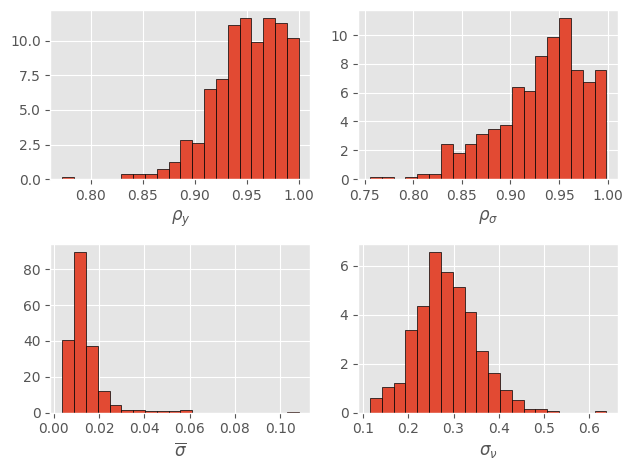

In [16]:
plt.subplot(221)
plt.hist(params['rho_y'], edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\rho_y$')

plt.subplot(222)
plt.hist(params['rho_sigma'], edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\rho_\sigma$')

plt.subplot(223)
plt.hist(np.exp(params['sigma_bar']), edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\overline{\sigma}$')

plt.subplot(224)
plt.hist(params['sigma_nu'], edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\sigma_\nu$')

plt.tight_layout()

plt.savefig('../fig/argentina_posterior.png', bbox_inches='tight')

In [10]:
# posterior draws of sigma[t] for each time period t
focus = [x for x in posterior.columns if '[' in x]
sigma = posterior[focus].transform(np.exp)
sigma

,sigma[1],sigma[2],sigma[3],sigma[4],sigma[5],sigma[6],sigma[7],sigma[8],sigma[9],sigma[10],...,sigma[97],sigma[98],sigma[99],sigma[100],sigma[101],sigma[102],sigma[103],sigma[104],sigma[105],sigma[106]
0,0.010723,0.011312,0.015112,0.015929,0.019478,0.013441,0.014150,0.014699,0.014029,0.016097,...,0.021602,0.027693,0.032901,0.032725,0.026654,0.024200,0.019421,0.014190,0.020086,0.016829
1,0.024023,0.024450,0.020059,0.015723,0.015627,0.011727,0.011416,0.015532,0.013513,0.012045,...,0.010046,0.009021,0.009764,0.011854,0.016485,0.017544,0.020362,0.020842,0.030884,0.028245
2,0.022460,0.025320,0.017618,0.015099,0.013956,0.011576,0.011517,0.012462,0.015886,0.012099,...,0.010055,0.008212,0.009869,0.012077,0.016693,0.018500,0.020267,0.027985,0.032833,0.029402
3,0.009450,0.014645,0.015571,0.019576,0.020157,0.018154,0.022810,0.018910,0.013582,0.018780,...,0.015882,0.013025,0.013294,0.013415,0.014872,0.015122,0.011881,0.010710,0.007768,0.011392
4,0.015032,0.014131,0.019868,0.022177,0.024404,0.027491,0.025467,0.030793,0.031131,0.015811,...,0.018951,0.020909,0.016965,0.014071,0.011864,0.010133,0.012148,0.014727,0.020886,0.014030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.013945,0.016511,0.011884,0.017281,0.018889,0.017450,0.010876,0.012274,0.020350,0.018242,...,0.009029,0.008952,0.010368,0.009221,0.009636,0.010938,0.015078,0.014930,0.017828,0.017691
496,0.015576,0.016572,0.032402,0.035366,0.025825,0.029239,0.021925,0.018122,0.018713,0.015144,...,0.013201,0.015856,0.018794,0.024609,0.020821,0.025675,0.021547,0.019301,0.025328,0.026184
497,0.052538,0.041737,0.046620,0.035921,0.025324,0.018904,0.024768,0.028007,0.017741,0.017011,...,0.010682,0.007647,0.007564,0.010240,0.012885,0.010856,0.008556,0.012393,0.011995,0.012102
498,0.026882,0.030415,0.026596,0.030586,0.024982,0.022878,0.021199,0.021055,0.022504,0.019845,...,0.013347,0.012177,0.010276,0.009041,0.008790,0.010423,0.012225,0.010254,0.012138,0.010477


In [11]:
# compute quantiles at each point t along the 0 axis
q20 = np.quantile(sigma, 0.20, axis=0)
q80 = np.quantile(sigma, 0.80, axis=0)
qmean = np.mean(sigma.values, axis=0)

In [12]:
# collect mean and confidence intervals into dataframe
sigma_ts = pd.DataFrame({'time':df.time})
sigma_ts['qmean'] = qmean
sigma_ts['q20'] = q20
sigma_ts['q80'] = q80
sigma_ts

,time,qmean,q20,q80
0,1992-07-01,0.017128,0.009777,0.022973
1,1992-10-01,0.016685,0.010440,0.021684
2,1993-01-01,0.017226,0.011884,0.021824
3,1993-04-01,0.018246,0.013140,0.022446
4,1993-07-01,0.017694,0.013053,0.021805
...,...,...,...,...
101,2017-10-01,0.016456,0.011258,0.020779
102,2018-01-01,0.017310,0.012147,0.021619
103,2018-04-01,0.019556,0.014124,0.024220
104,2018-07-01,0.020815,0.014845,0.026630


/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_3223/582003518.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_3223/582003518.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)


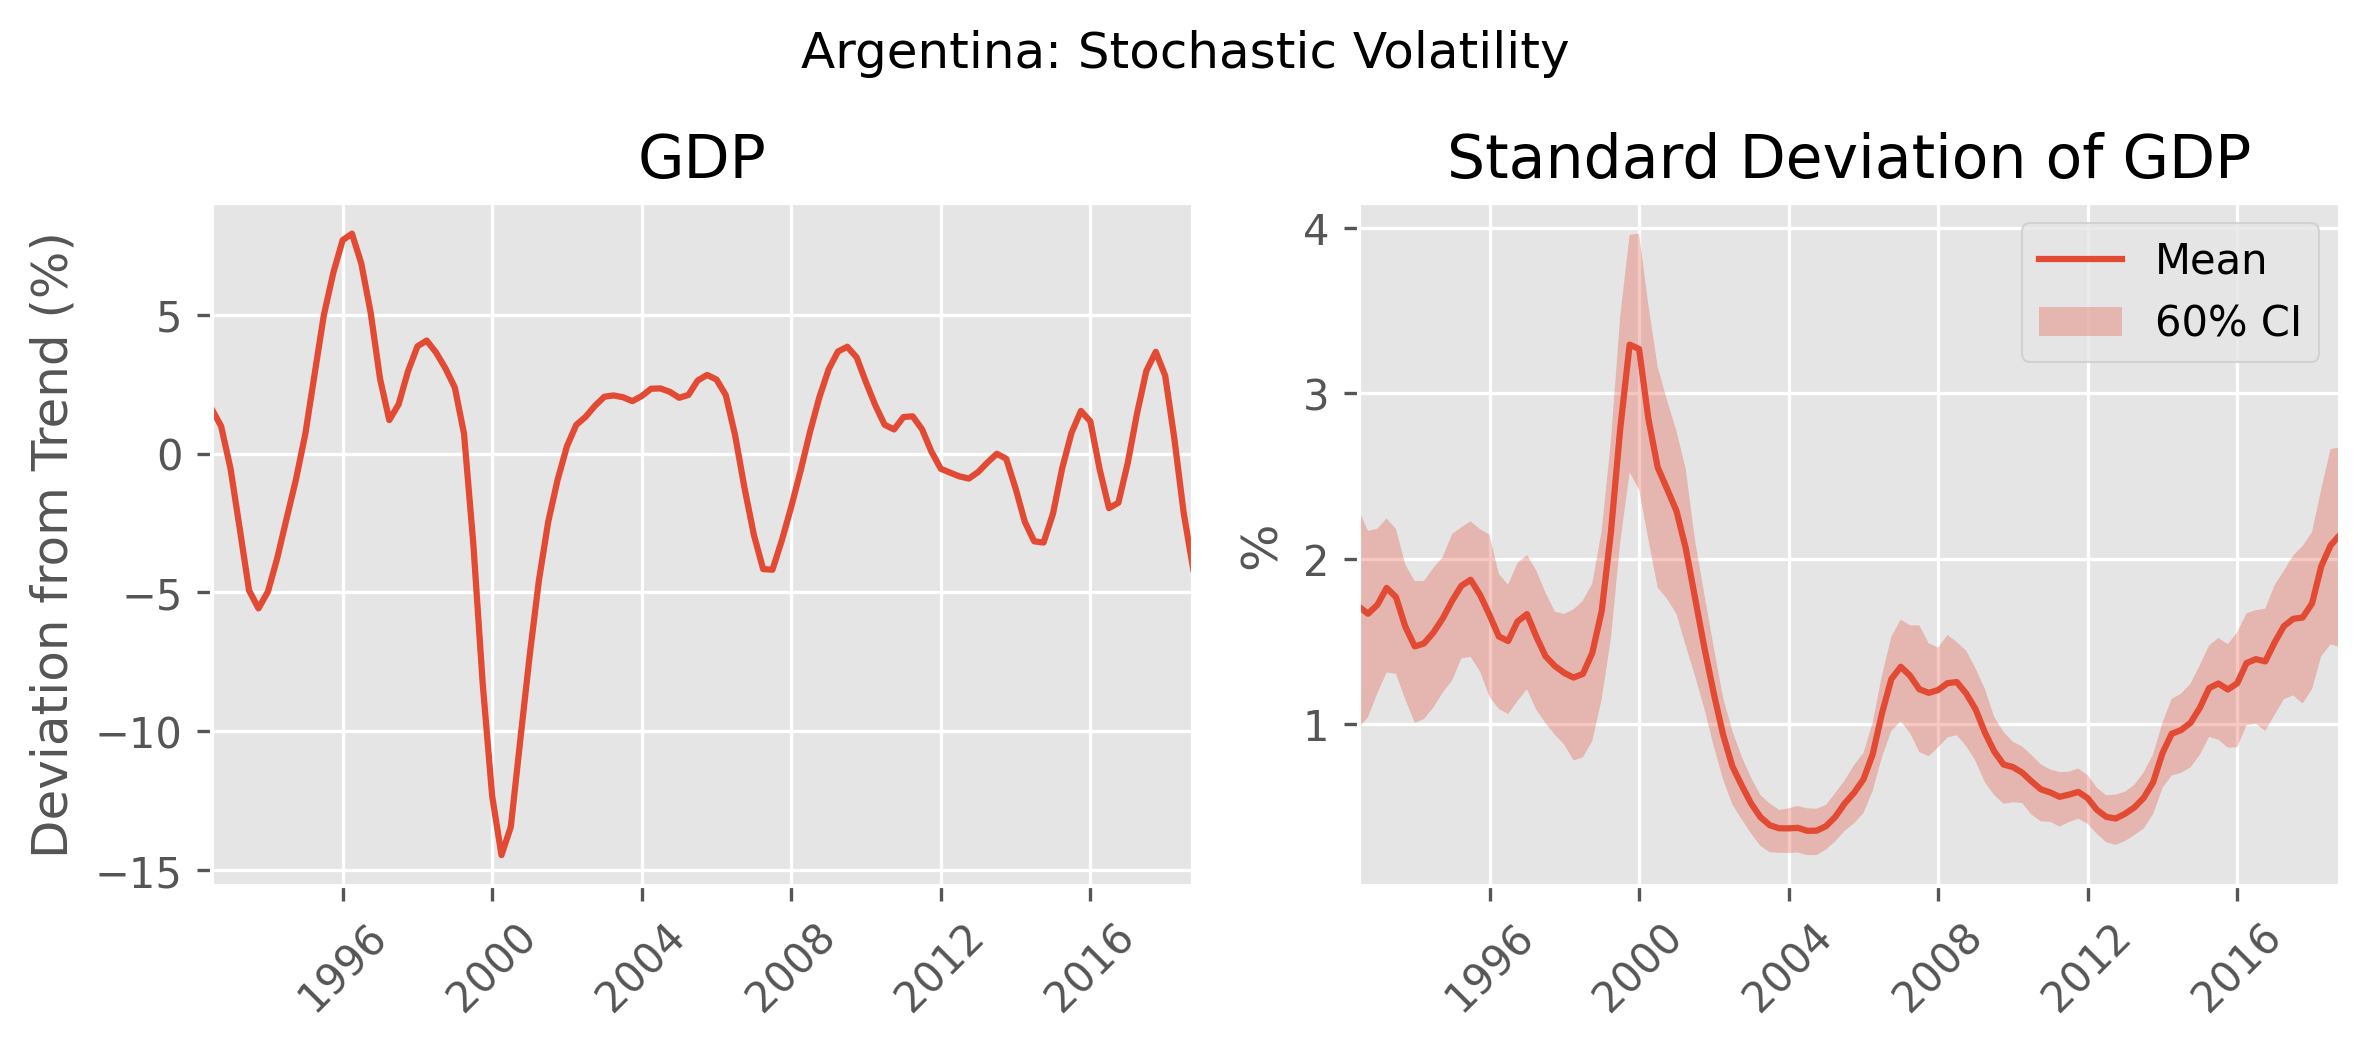

In [15]:
import matplotlib.dates as mdates
fig = plt.figure(figsize=(8, 6), dpi=300)

fig.suptitle('Argentina: Stochastic Volatility')

ax = plt.subplot(221)
ax.plot(df.time, 100*df.logy_cycle)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Deviation from Trend (%)')
ax.set_title('GDP')
plt.margins(x=0)

ax = plt.subplot(222)
ax.plot(sigma_ts.time, 100*sigma_ts.qmean, label='Mean')
ax.fill_between(sigma_ts.time, 100*sigma_ts.q20, 100*sigma_ts.q80, alpha=0.3, 
                label='60% CI')
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_title('Standard Deviation of GDP')
ax.set_ylabel('%')
plt.margins(x=0)
ax.legend()

plt.tight_layout()

plt.savefig('../fig/argentina_stochastic_volatility.png', 
            bbox_inches='tight')